In [1]:
from glob import glob
from os import path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
buffer_dir = '/mnt/nas/instructed_rl/pcgrl_buffer2'

In [3]:
dir_path = path.join(buffer_dir, '*', '*.npz')
file_list = glob(dir_path, recursive=True)
len(file_list)

63

In [4]:
rewards = []

for file in tqdm(file_list, desc="Loading buffer files"):

    data = np.load(file, allow_pickle=True).get('buffer').item()
    
    reward = data.get('reward')
    rewards.append(reward)

reward_raw = np.concatenate(rewards, axis=0)

Loading buffer files: 100%|████████████████████████████████████████████████████████████████████████████████| 63/63 [01:19<00:00,  1.26s/it]


In [ ]:
reward = reward_raw.copy()

(1890, 128)


(array([[ 9.,  0.,  0., ...,  0.,  0., 16.],
        [14.,  0.,  0., ...,  0.,  0., 15.],
        [11.,  0.,  0., ...,  0.,  0.,  9.],
        ...,
        [11.,  0.,  0., ...,  0.,  0., 12.],
        [11.,  0.,  0., ...,  0.,  0., 16.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-1.        , -0.98000002, -0.95999998, -0.94      , -0.92000002,
        -0.89999998, -0.88      , -0.86000001, -0.83999997, -0.81999999,
        -0.80000001, -0.77999997, -0.75999999, -0.74000001, -0.72000003,
        -0.69999999, -0.68000001, -0.66000003, -0.63999999, -0.62      ,
        -0.60000002, -0.57999998, -0.56      , -0.54000002, -0.51999998,
        -0.5       , -0.47999999, -0.46000001, -0.44      , -0.41999999,
        -0.40000001, -0.38      , -0.36000001, -0.34      , -0.31999999,
        -0.30000001, -0.28      , -0.25999999, -0.23999999, -0.22      ,
        -0.2       , -0.18000001, -0.16      , -0.14      , -0.12      ,
        -0.1       , -0.08      , -0.06      , -0.04      

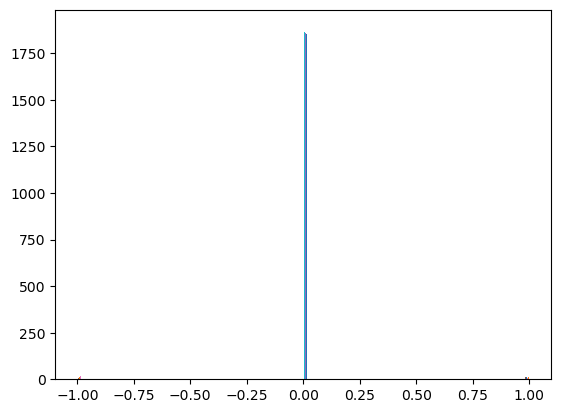

In [36]:
reward = reward_raw.copy()
reward = reward.clip(-1, 1)
print(reward.shape)
plt.hist(reward, bins=100)

(241920,)


(array([1418.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  384.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 2380.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  609.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1439.]),
 array([-1.        , -0.98000002, -0.95999998, -0.94      , -0.92000002,
        -0.89999998, -0.88      , -0.86000001, -0.83999997, -0.81999999,
        -0.80000001, -0.77999997, -0.75999999, -0.740000

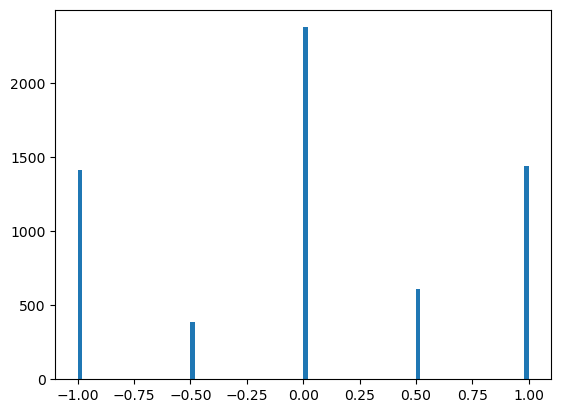

In [48]:
reward = reward_raw.copy().flatten()
print(reward.shape)
zero_indices = np.where((reward < 0.001) & (reward > -0.001))[0]
non_zero_indices = np.where(reward != 0)[0]

reward = reward.clip(-1, 1)
num_to_keep = int(len(zero_indices) * 0.01)
 
final_indices = np.concatenate([non_zero_indices, keep_indices])

reward_filtered = reward[final_indices]

plt.hist(reward_filtered, bins=100)